In [62]:
%matplotlib inline
import glob, pandas as pd
pd.options.display.max_rows = 999
y16 = glob.glob('2016'+'/*.txt')
y15 = glob.glob('2015'+'/*.txt')
y14 = glob.glob('2014'+'/*.txt')
y14_16=y14+y15+y16
with open("result.txt", "wb") as outfile:
    for f in y14_16:
        with open(f, "rb") as infile:
            lines=infile.read().split('\n')
            for line in lines:
                if len(line.split('\t'))==8:
                    outfile.write(line+'\n')

In [63]:
df=pd.read_table('result.txt',header=None)
df=df[df[7]==1]
df.shape

(8395622, 8)

In [64]:
df.head()

,0,1,2,3,4,5,6,7
0,10.1001/2013.jamasurg.124,2014,0,0,2168-6254,JAMA Surgery,American Medical Association (AMA),1
1,10.1001/2013.jamasurg.273,2014,0,0,2168-6254,JAMA Surgery,American Medical Association (AMA),1
2,10.1001/2013.jamasurg.351,2014,0,0,2168-6254,JAMA Surgery,American Medical Association (AMA),1
3,10.1001/2013.jamasurg.356,2014,0,0,2168-6254,JAMA Surgery,American Medical Association (AMA),1
4,10.1001/jama.2013.133752,2014,0,0,0098-7484,JAMA,American Medical Association (AMA),1


In [65]:
df[1]=df[1].astype(int)

In [66]:
df=df[df[1]<=2017][df[1]>=1950]
#df=df[df[7]==0]

In [67]:
df['count']=1
df['cited']=df[3].apply(lambda x: 1 if x>0 else 0)
df['un-cited']=df[3].apply(lambda x: 0 if x>0 else 1)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


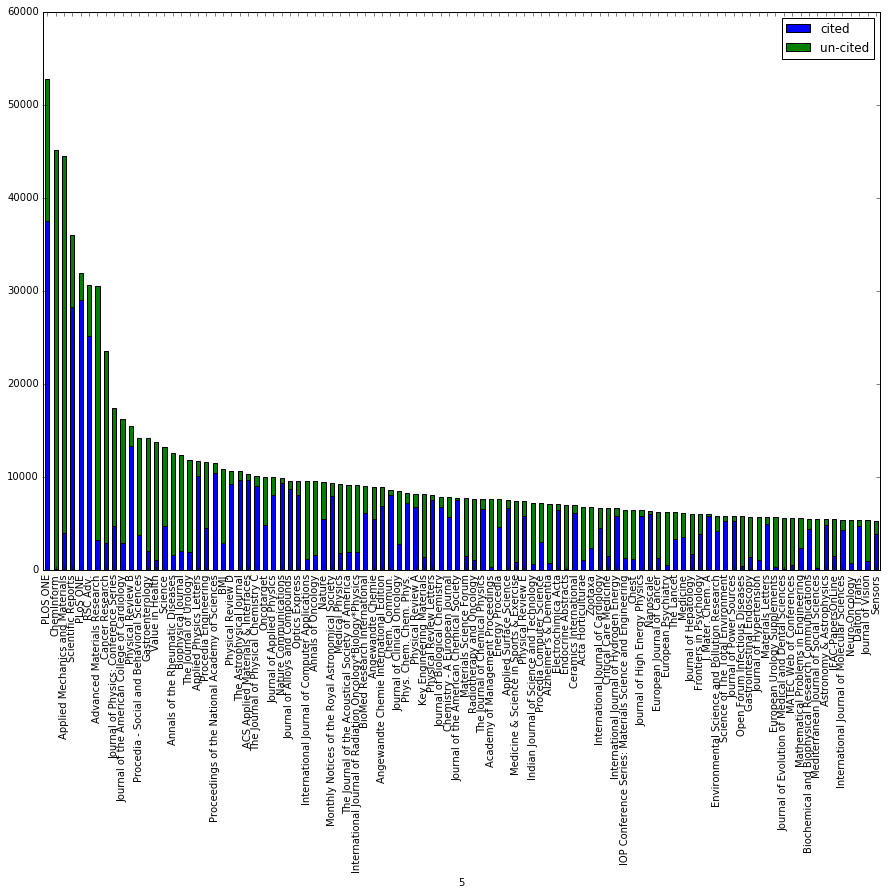

In [68]:
dg=df.groupby(df[5])['count','cited','un-cited'].sum()
dg=dg.sort('count',ascending=False)
dg[['cited','un-cited']].head(100).plot(kind='bar',figsize=(15,10),stacked=True)

In [69]:
dg=df[['count','cited',3,5]].groupby(df[5]).sum()
dg=dg.sort('count',ascending=False).reset_index()
dg=dg[dg['count']>1000]
dg

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,5,count,cited,3
0,PLOS ONE,52807,37516,138769
1,ChemInform,45075,96,106
2,Applied Mechanics and Materials,44484,3926,6086
3,Scientific Reports,36015,28209,163886
4,PLoS ONE,31908,29001,229986
5,RSC Adv.,30638,25130,131938
6,Advanced Materials Research,30540,3149,4849
7,Cancer Research,23532,2895,19532
8,Journal of Physics: Conference Series,17402,4704,9240
9,Journal of the American College of Cardiology,16225,2882,39625


In [70]:
dg.to_csv('high_volum.csv')

In [71]:
df[df[5]=='European Journal of Public Health']

,0,1,2,3,4,5,6,7,count,cited,un-cited
365543,10.1093/eurpub/ckt205,2014,44,7,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365547,10.1093/eurpub/ckt213,2014,40,7,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365555,10.1093/eurpub/cku006,2014,37,6,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365557,10.1093/eurpub/cku008,2014,27,2,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365559,10.1093/eurpub/cku010,2014,35,23,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365562,10.1093/eurpub/cku013,2014,40,3,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365564,10.1093/eurpub/cku015,2014,26,3,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365566,10.1093/eurpub/cku017,2014,40,10,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365574,10.1093/eurpub/cku025,2014,27,7,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
365575,10.1093/eurpub/cku026,2014,40,11,"1464-360X,1101-1262",European Journal of Public Health,Oxford University Press (OUP),1,1,1,0
